In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cluster_two_blobs.csv')
df1 = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

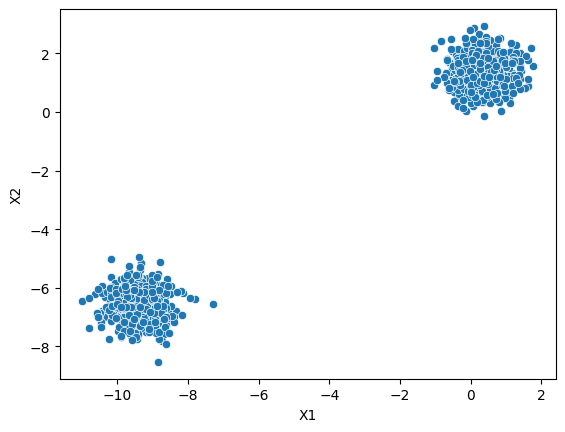

In [3]:
sns.scatterplot(data=df, x= 'X1', y= 'X2');

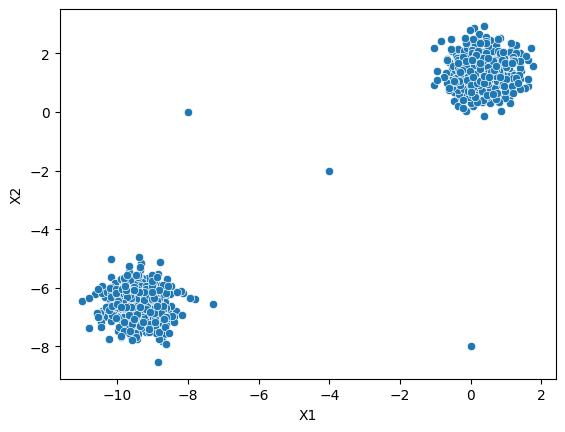

In [4]:
sns.scatterplot(data=df1, x= 'X1', y= 'X2');

In [9]:
def display_categories(model, data):
    label = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=label, palette='Set1');

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
db = DBSCAN()

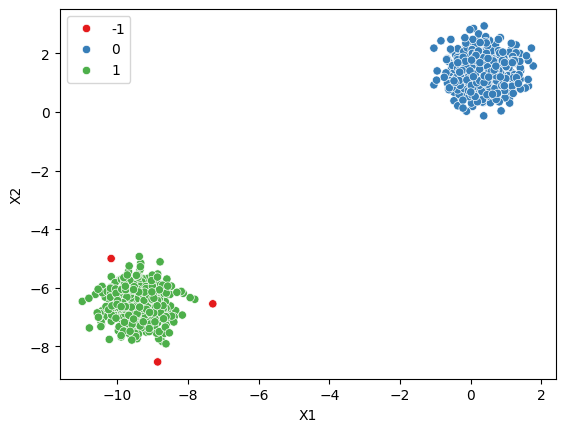

In [10]:
display_categories(db, df)

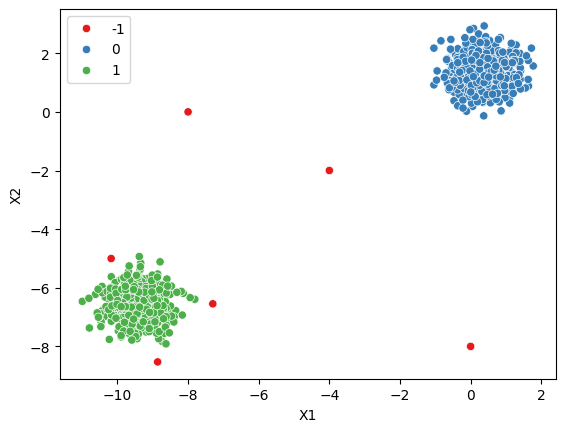

In [11]:
display_categories(db, df1)

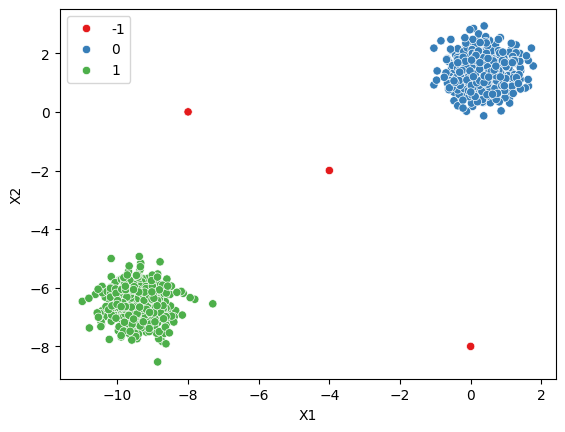

In [15]:
db = DBSCAN(eps=1)
display_categories(db, df1)

In [27]:
(100 * np.sum(db.labels_ == -1))/len(db.labels_)

np.float64(0.29910269192422734)

In [37]:
outliers_percent = []
number_of_outliers = []
unique_clusters_outliers = []

for eps in np.linspace(0.001, 10, 100):
    
    db = DBSCAN(eps=eps)
    db.fit(df1)

    number_of_outliers.append(np.sum(db.labels_ == -1))
    
    percent_outliers = (100 * np.sum(db.labels_ == -1)) / len(db.labels_)
    outliers_percent.append(percent_outliers)

    unique_cluster = len(np.unique(db.labels_))
    unique_clusters_outliers.append(unique_cluster)

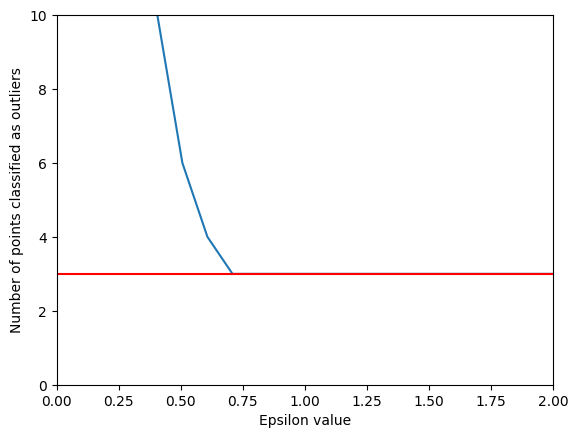

In [51]:
sns.lineplot(x = np.linspace(.001, 10, 100), y = number_of_outliers)
plt.hlines(y = 3, xmin = 0, xmax=4, color = 'red')
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.ylabel('Number of points classified as outliers')
plt.xlabel('Epsilon value');

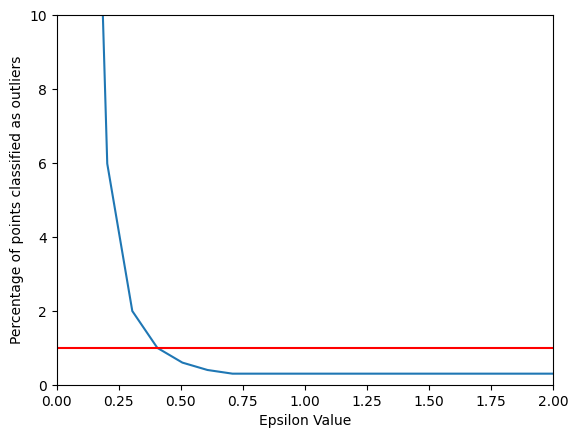

In [53]:
sns.lineplot(x= np.linspace(0.001, 10, 100), y = outliers_percent)
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.hlines(y = 1, xmin=0, xmax=2, color = 'red')
plt.ylabel('Percentage of points classified as outliers')
plt.xlabel('Epsilon Value');

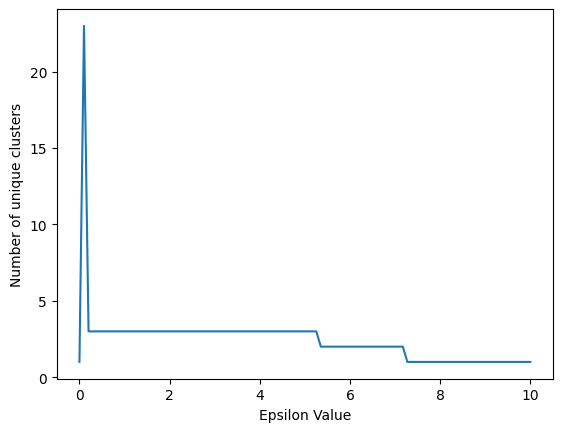

In [46]:
sns.lineplot(x= np.linspace(0.001, 10, 100), y = unique_clusters_outliers)
plt.xlabel('Epsilon Value')
plt.ylabel('Number of unique clusters');

In [55]:
outliers_percent = []
number_of_outliers = []
unique_clusters_outliers = []

for n in np.arange(1, 100):
    
    db = DBSCAN(min_samples=n)
    db.fit(df1)

    number_of_outliers.append(np.sum(db.labels_ == -1))
    
    percent_outliers = (100 * np.sum(db.labels_ == -1)) / len(db.labels_)
    outliers_percent.append(percent_outliers)

    unique_cluster = len(np.unique(db.labels_))
    unique_clusters_outliers.append(unique_cluster)

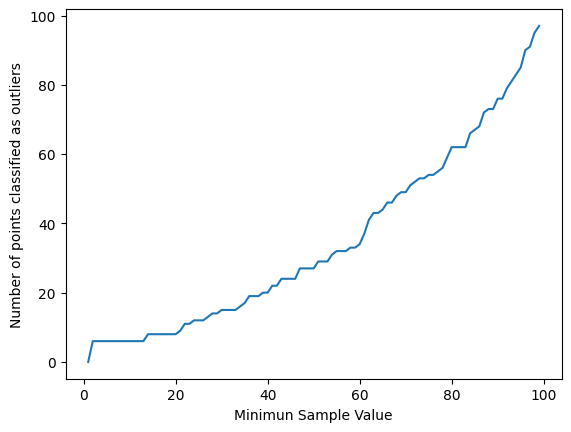

In [56]:
sns.lineplot(x = np.arange(1, 100), y = number_of_outliers)
# plt.hlines(y = 3, xmin = 0, xmax=4, color = 'red')
# plt.xlim(0, 2)
# plt.ylim(0, 10)
plt.ylabel('Number of points classified as outliers')
plt.xlabel('Minimun Sample Value');

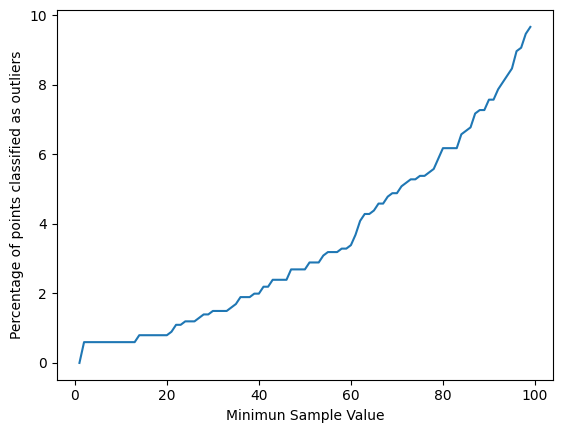

In [57]:
sns.lineplot(x = np.arange(1, 100), y = outliers_percent)
# plt.hlines(y = 3, xmin = 0, xmax=4, color = 'red')
# plt.xlim(0, 2)
# plt.ylim(0, 10)
plt.ylabel('Percentage of points classified as outliers')
plt.xlabel('Minimun Sample Value');

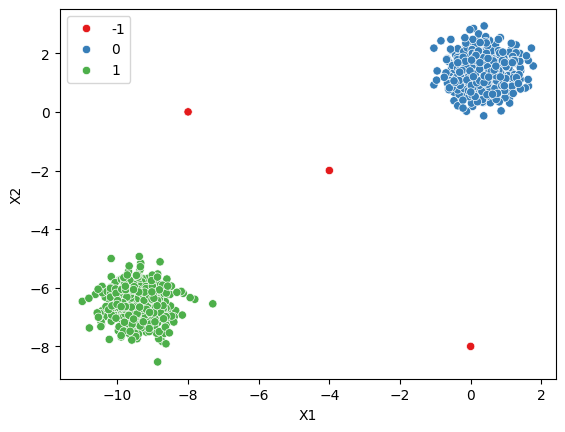

In [63]:
display_categories(DBSCAN(min_samples=2*2, eps=0.75), df1)